In [102]:
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.manifold import MDS
import seaborn as sns         
import numpy as np


def plot_mds(original, gan):
    plt.style.use("seaborn")
    fig, ax = plt.subplots(1, 1, figsize=(5.5, 4))
    plt.scatter(x=gan[:, 0], y=gan[:, 1], s=10, color="blue")
    plt.scatter(x=original[:, 0], y=original[:, 1], s=10, color="black")
    
    # perfumaria
    plt.xlabel("X component")
    plt.ylabel("Y component")
    plt.title("Multidimensional scaling")
    plt.legend(["Proposed workflow", "Traditional workflow"],
            bbox_to_anchor = (1.05, 0.5))
    #plt.savefig("data/results/mds.png", dpi=500, bbox_inches='tight')


def mds_plots(snesim_realizations_path, gan_realizations_path):
    traditional = np.load(snesim_realizations_path).reshape((100, -1))
    proposed = np.load(gan_realizations_path).reshape((100, -1))

    dist_euclid = euclidean_distances(traditional)
    mds = MDS(n_components=20, metric=True, random_state=0)
    # Get the embeddings
    original = mds.fit_transform(dist_euclid)

    # Get the embeddings
    dist_euclid_gan = euclidean_distances(proposed)
    gan = mds.fit_transform(dist_euclid_gan)   

    plot_mds(original, gan)

/home/lpm/gan-for-mps/.venv/lib/python3.8/site-packages/sklearn/manifold/_mds.py:512: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
/home/lpm/gan-for-mps/.venv/lib/python3.8/site-packages/sklearn/manifold/_mds.py:512: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
/tmp/ipykernel_14168/133877984.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


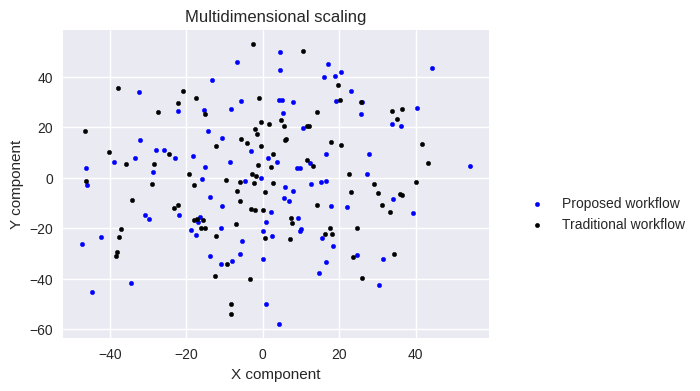

In [103]:
mds_plots(snesim_realizations_path="snesim/data/realizations.npy",
            gan_realizations_path="generative_model/data/realizations.npy")

In [ ]:
snesim_realizations = np.load("snesim/data/realizations.npy").reshape((100, -1))
gan_realizations = np.load("generative_model/data/realizations.npy").reshape((100, -1))

## Get PCA components that explain 80% of the dataset variance

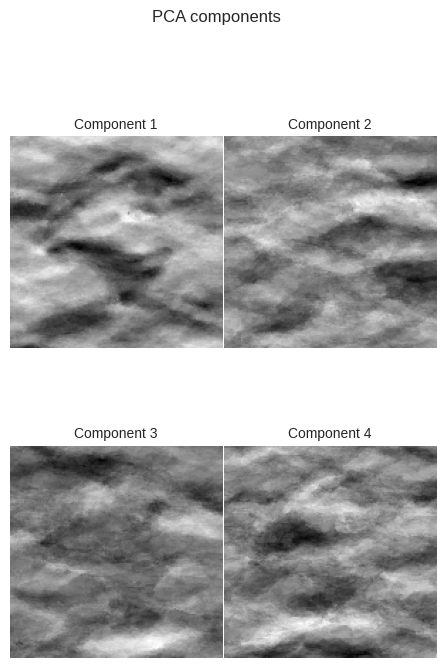

In [124]:
from sklearn.decomposition import PCA
# n_components=0.80 means it will return the Eigenvectors that have the 80% of the variation in the dataset

faces_pca = PCA(n_components=0.8)
faces_pca.fit(gan_realizations)
fig, axes = plt.subplots(2, 2, figsize=(5.5, 8),
    subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.010, wspace=0.010))

plt.suptitle("PCA components")
for i, ax in enumerate(axes.flat):
    ax.set_title(f"Component {i+1}", fontsize=10)
    ax.imshow(faces_pca.components_[i].reshape(150, 150),cmap="binary")

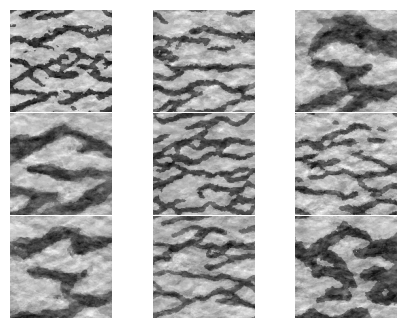

In [128]:
components = faces_pca.transform(gan_realizations)
projected = faces_pca.inverse_transform(components)
fig, axes = plt.subplots(3, 3, figsize=(5.5, 4), subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(projected[i].reshape(150,150),cmap="binary")

## Boxplot with standard deviation differences

In [84]:
import pandas as pd

ti_dict = dict()
for idx, realization in enumerate(snesim_realizations):
    ti_dict[f'ti_{idx+1}'] = np.array(realization.reshape(-1))

snesim_dataframe = pd.DataFrame(ti_dict)

ti_dict = dict()
for idx, realization in enumerate(gan_realizations):
    ti_dict[f'ti_{idx+1}'] = np.array(realization.reshape(-1))

gan_dataframe = pd.DataFrame(ti_dict)

dict_std = {"Traditional": snesim_dataframe.std(axis=1),
        "Proposed": gan_dataframe.std(axis=1)}

[Text(1, 0, 'Traditional'), Text(2, 0, 'Proposed')]

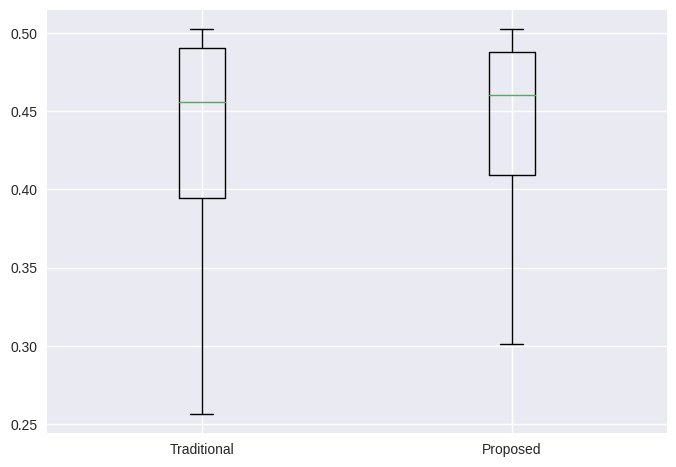

In [91]:
fig, ax = plt.subplots()
ax.boxplot(dict_std.values(), showfliers=False)
ax.set_xticklabels(dict_std.keys())

## Get optimum `n_components`

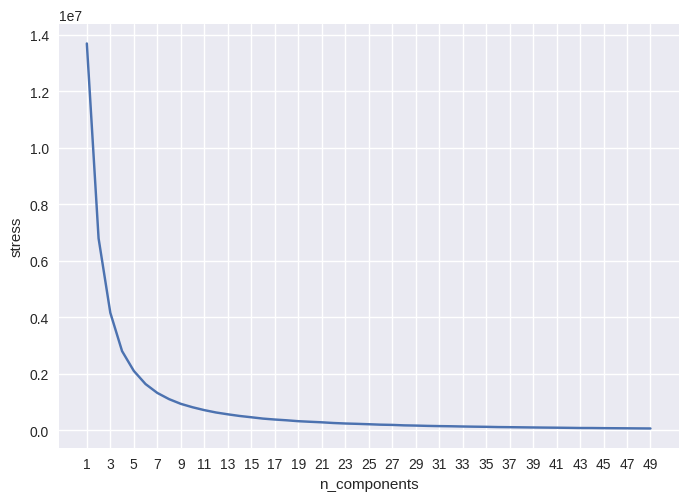

In [130]:
stress = []
# Max value for n_components
max_range = 50
for dim in range(1, max_range):
    # Set up the MDS object
    mds = MDS(n_components=dim, random_state=0)
    # Apply MDS
    pts = mds.fit_transform(
        np.load("snesim/data/realizations.npy").reshape((100, -1))
        )
    # Retrieve the stress value
    stress.append(mds.stress_)

# Plot stress vs. n_components    
plt.plot(range(1, max_range), stress)
plt.xticks(range(1, max_range, 2))
plt.xlabel('n_components')
plt.ylabel('stress')
plt.show()